In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Working with Quadratic Equations

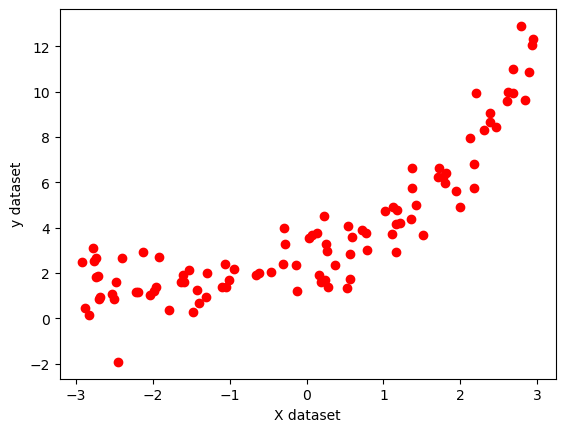

In [4]:
X = 6 * np.random.rand(100,1)-3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
## quadratic Equation used -> y = 0.5x^2 + 1.5x + 2 + outlires
plt.scatter(X,y,color='r')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()

In [17]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
## inplement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [18]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.7955196990125201


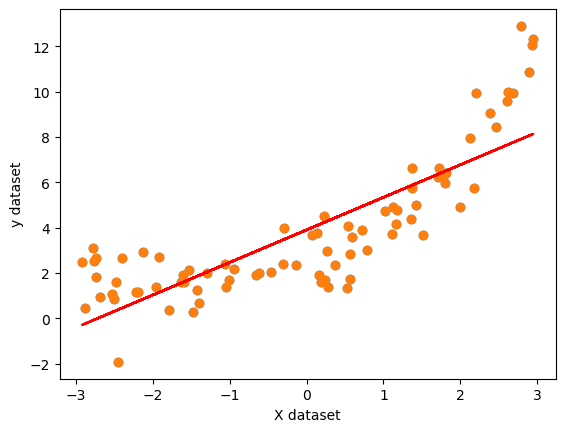

In [22]:
## Lets visulalize the ,odel
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train, y_train)
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()

In [ ]:
### lets apply polynmial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
X_train_poly
## the output include 3 difffrent coloumns, the first one is the bias term which comes from {include_bias=True}, the second one is the X and the third one is X^2

array([[ 1.00000000e+00,  5.87699569e-01,  3.45390783e-01],
       [ 1.00000000e+00, -2.13443574e+00,  4.55581595e+00],
       [ 1.00000000e+00,  1.37176994e+00,  1.88175277e+00],
       [ 1.00000000e+00,  1.39061848e-01,  1.93381976e-02],
       [ 1.00000000e+00, -1.37598775e-01,  1.89334229e-02],
       [ 1.00000000e+00,  1.36532281e+00,  1.86410638e+00],
       [ 1.00000000e+00, -2.53356294e+00,  6.41894117e+00],
       [ 1.00000000e+00, -2.76832969e+00,  7.66364925e+00],
       [ 1.00000000e+00,  1.81110211e+00,  3.28009085e+00],
       [ 1.00000000e+00,  2.12557988e+00,  4.51808983e+00],
       [ 1.00000000e+00,  1.77184452e+00,  3.13943302e+00],
       [ 1.00000000e+00,  2.39009021e+00,  5.71253123e+00],
       [ 1.00000000e+00, -1.62930259e+00,  2.65462694e+00],
       [ 1.00000000e+00,  1.11208360e+00,  1.23672994e+00],
       [ 1.00000000e+00, -1.42452650e+00,  2.02927574e+00],
       [ 1.00000000e+00,  7.23214136e-01,  5.23038686e-01],
       [ 1.00000000e+00, -2.22539255e+00

In [27]:
regression_1.fit(X_train_poly, y_train)
y_pred = regression_1.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9052501229722949


In [28]:
print(regression_1.coef_)

[[0.         1.50612919 0.50823785]]


In [29]:
print(regression_1.intercept_)

[2.29867366]


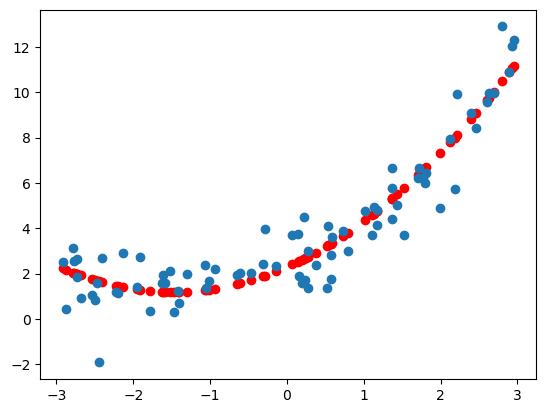

In [31]:
plt.scatter(X_train,regression_1.predict(X_train_poly),color='r')
plt.scatter(X_train, y_train)
plt.show()

In [32]:
## changing degree value at 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
regression_1.fit(X_train_poly, y_train)
y_pred = regression_1.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9215667049101239


In [35]:
## prediction of the new data
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

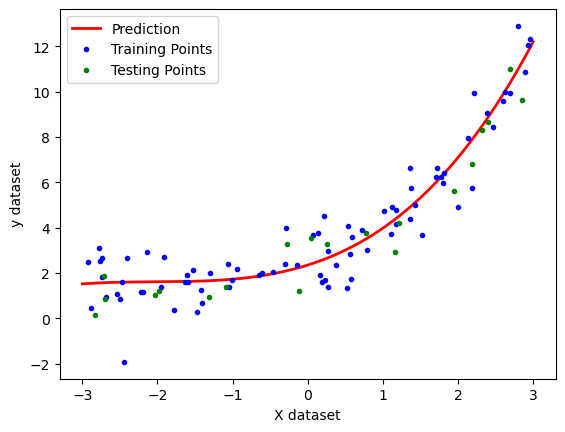

In [36]:
y_new = regression_1.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label='Prediction')
plt.plot(X_train, y_train, "b.", label='Training Points')
plt.plot(X_test, y_test, "g.", label='Testing Points')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.legend()
plt.show()

# **PIPELINING IN POLYNOMIAL**

In [37]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
  X_new = np.linspace(-3, 3, 200).reshape(200, 1)

  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  lin_reg = LinearRegression()
  poly_regression = Pipeline([
    ('poly_features', poly_features),
    ('lin_reg', lin_reg)  
  ])

  poly_regression.fit(X_train, y_train) ## polynomial and fit of linear regression
  y_pred_new = poly_regression.predict(X_new)
  # Plotting the Prediction line
  plt.plot(X_new, y_pred_new, color='red', label="Degree"+str(degree), linewidth=3)
  plt.plot(X_train, y_train, "b.", label='Training Points', linewidth=3)
  plt.plot(X_test, y_test, "g.", label='Testing Points', linewidth=3)
  plt.xlabel('X dataset')
  plt.ylabel('y dataset')
  plt.axis([-4,4,0,10])
  plt.legend()
  plt.show()

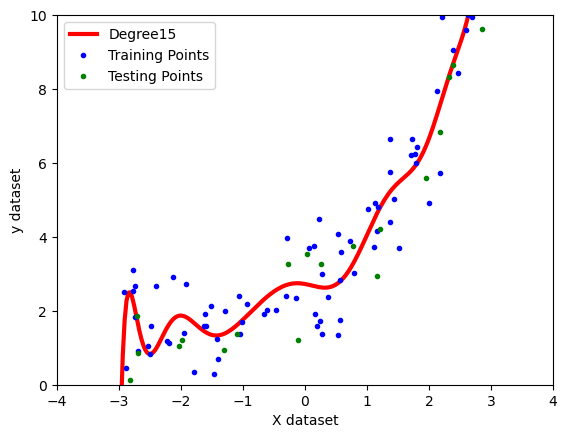

In [52]:
poly_regression(15)